In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('USA_Housing.csv')

In [3]:
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
dataset1 = dataset.drop(columns = 'Address',axis = 1)

In [5]:
dataset1.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [6]:
dataset1.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


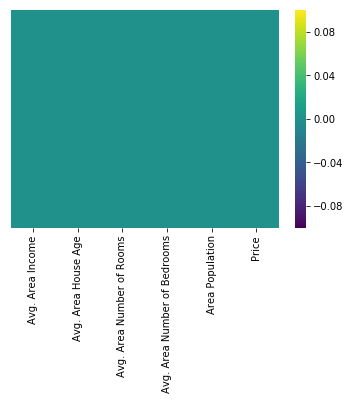

In [7]:
sns.heatmap(data = dataset1.isnull(),cmap = 'viridis',yticklabels = False)
#there is no null value

In [8]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
dtypes: float64(6)
memory usage: 234.4 KB


In [9]:
dataset1['average_bedroom'] = round(dataset1['Avg. Area Number of Bedrooms'])

In [10]:
dataset1.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,average_bedroom
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,4.0
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,3.0
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,5.0
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,3.0
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,4.0


In [11]:
#sns.set_style('whitegrid')
#sns.countplot(x = 'Avg. Area Number of Rooms',hue ='average_bedroom',data = dataset1,palette = 'rainbow' )

In [12]:
X = dataset1.iloc[:,:-2]

In [13]:
y = dataset1.iloc[:,5:6]

In [14]:
import cufflinks as cf
cf.go_offline()

In [15]:
dataset1.iplot(kind = 'scatter',x='Avg. Area House Age',y = 'Avg. Area Number of Rooms',z = 'Avg. Area Number of Bedrooms')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [17]:
from sklearn.linear_model import LinearRegression
lov = LinearRegression()
lov.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
print(lov.intercept_)

[-2647617.07230319]


In [19]:
prediction = lov.predict(X_test)

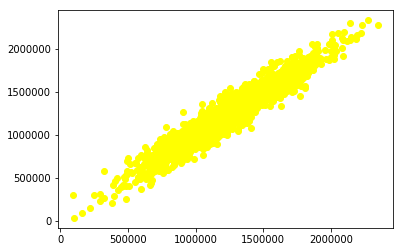

In [20]:
plt.scatter(prediction,y_test,color = 'yellow')

In [21]:
from sklearn import metrics

In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 81778.67738370203
MSE: 10331657030.971188
RMSE: 101644.75899411237
